In [4]:
import pandas as pd
from matplotlib import pyplot as plt

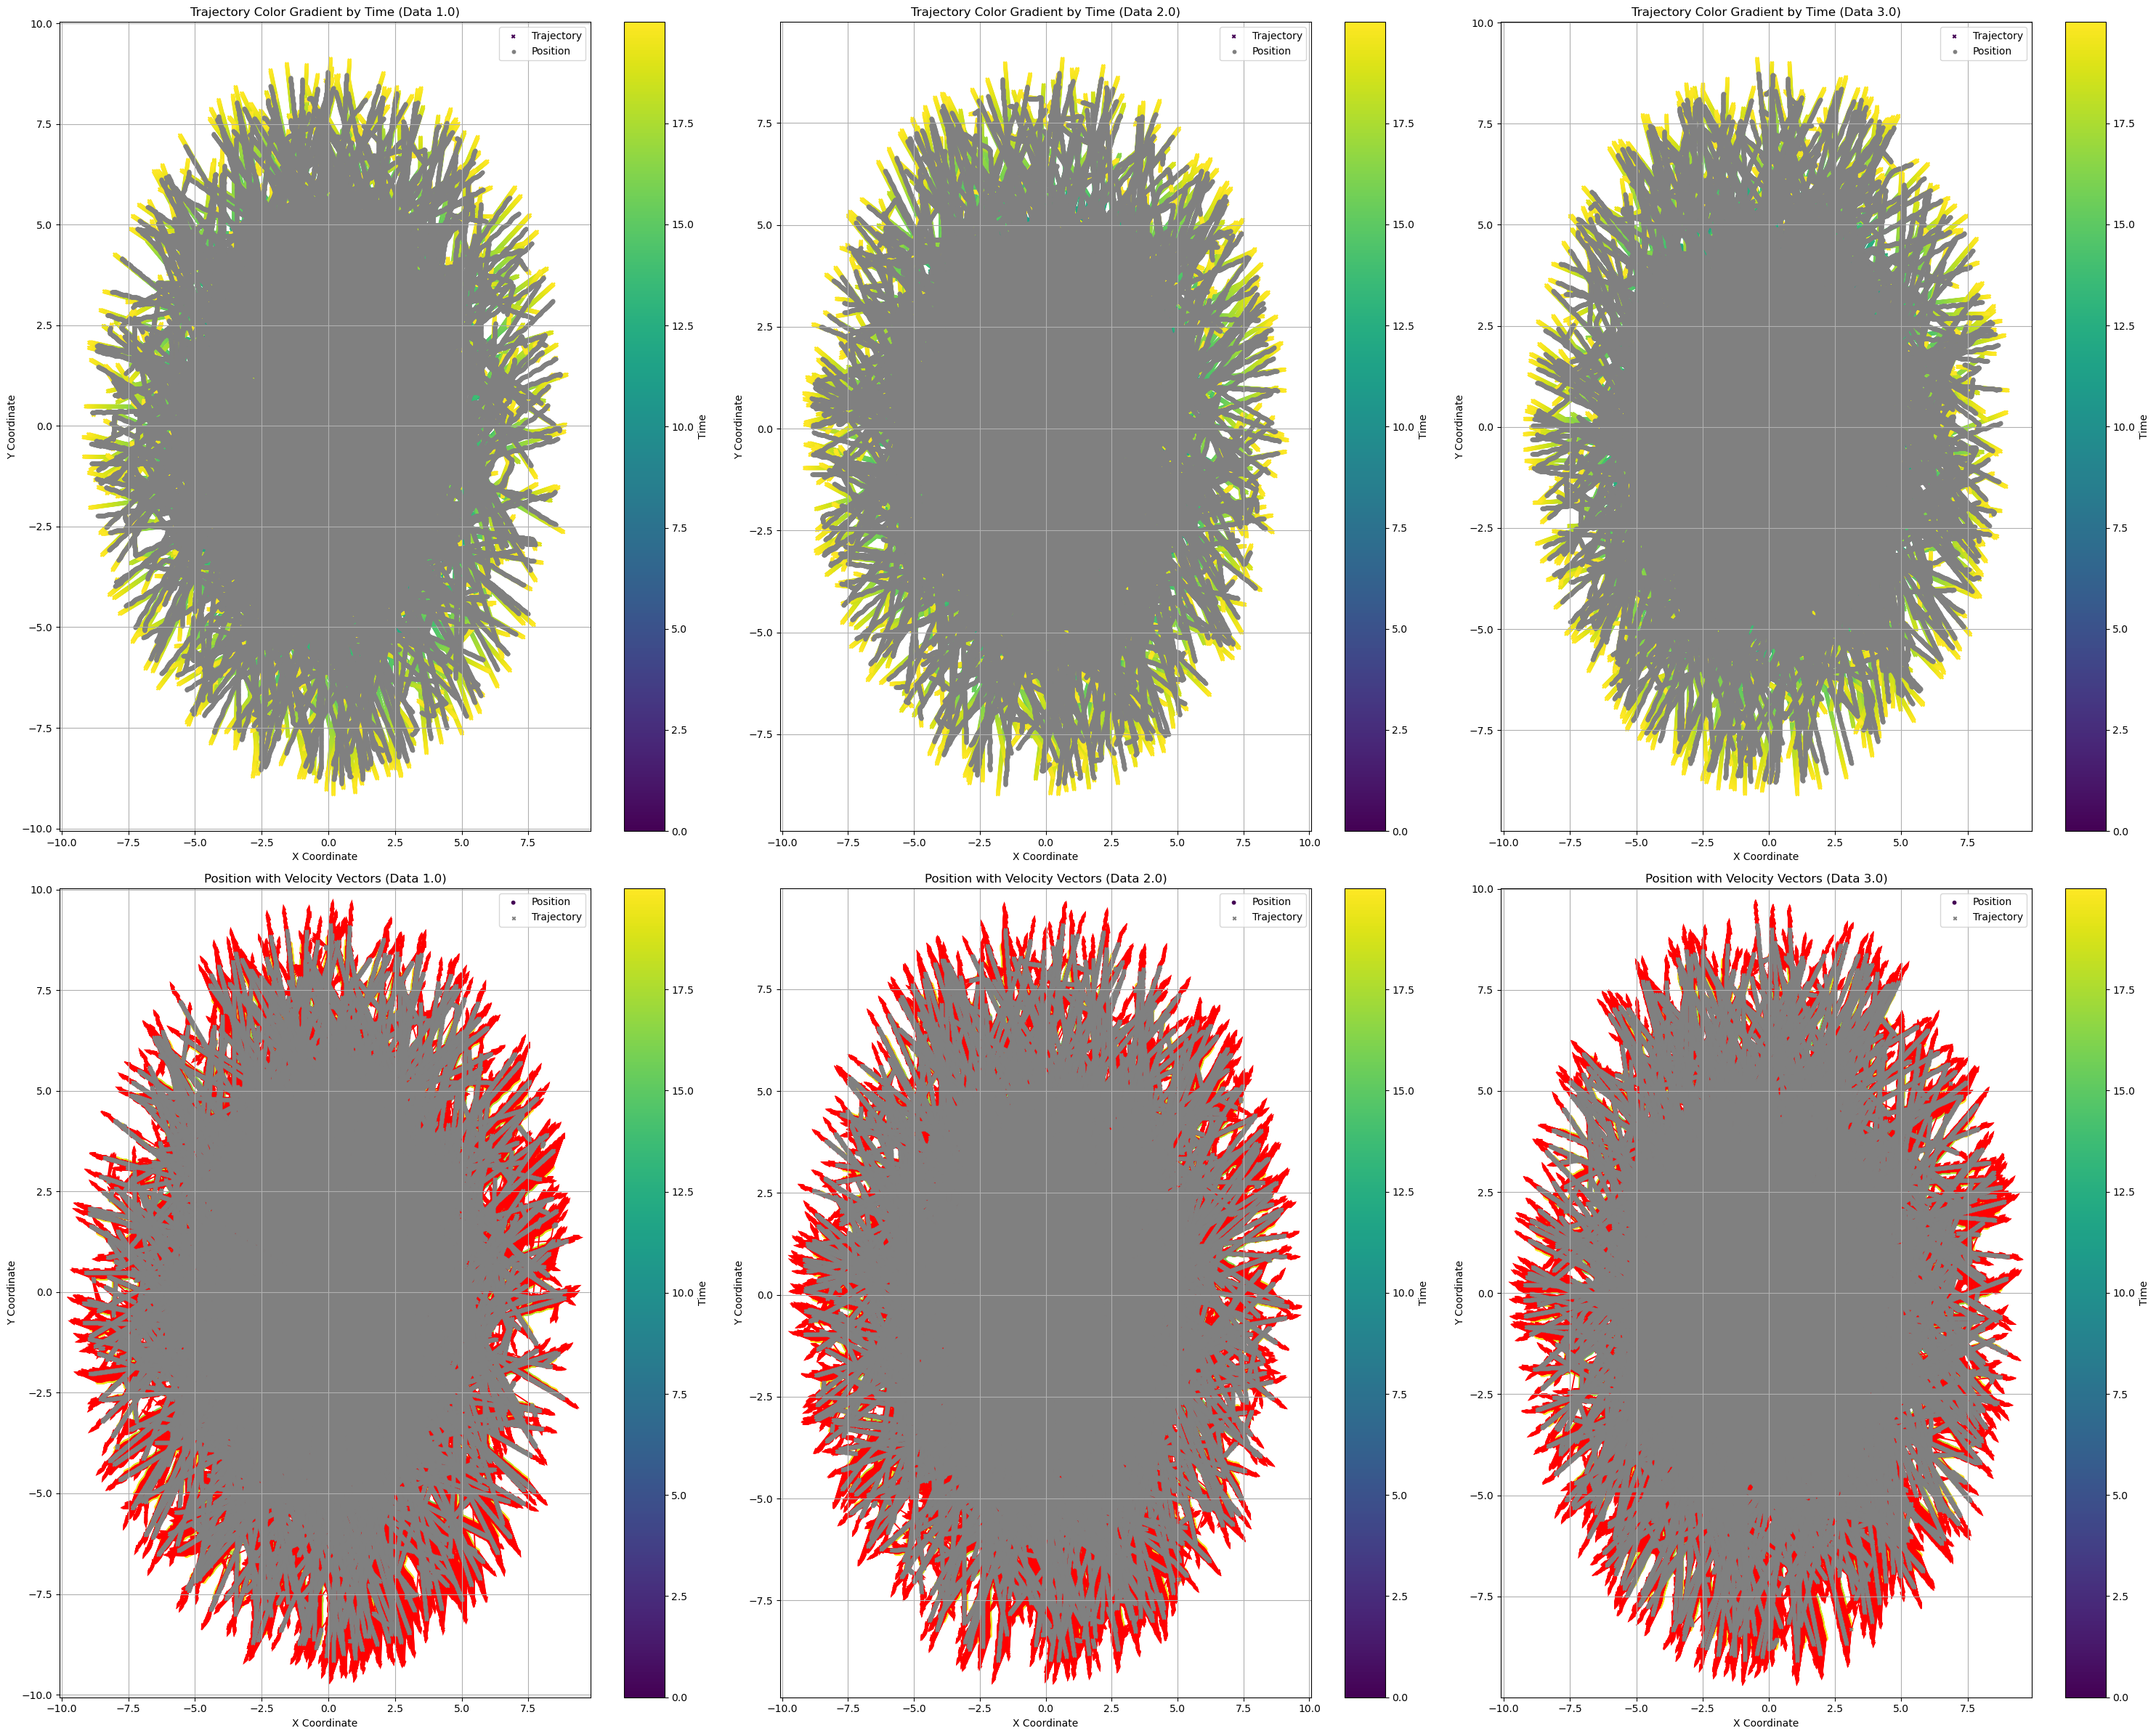

In [44]:
# Base file path
base_file_path = 'trajectory_data_'

# Number of files
n_files = 3

# Prepare the figure with one row per plot type and one column per file
fig, axs = plt.subplots(2, n_files, figsize=(10 * n_files, 24))

# Loop through each file
for i in range(1, n_files + 1):
    file_path = f'{base_file_path}{i}.0.csv'
    data = pd.read_csv(file_path)

    # Extract the relevant columns for positions and trajectories
    positions = data[['position_x', 'position_y']]
    trajectories = data[['traj_x', 'traj_y']]
    velocity = data[['velocity_x', 'velocity_y']]

    # Plot with color gradient only on the trajectory for the current file
    scatter_traj = axs[0, i-1].scatter(trajectories['traj_x'], trajectories['traj_y'], c=data['time'], cmap='viridis', label='Trajectory', marker='x', s=10)
    axs[0, i-1].scatter(positions['position_x'], positions['position_y'], label='Position', marker='o', s=10, color='gray')
    fig.colorbar(scatter_traj, ax=axs[0, i-1], label='Time')
    axs[0, i-1].set_title(f'Trajectory Color Gradient by Time (Data {i}.0)')
    axs[0, i-1].set_xlabel('X Coordinate')
    axs[0, i-1].set_ylabel('Y Coordinate')
    axs[0, i-1].legend()
    axs[0, i-1].grid(True)

    # Plot with color gradient only on the position for the current file, including velocity vectors
    scatter_pos = axs[1, i-1].scatter(positions['position_x'], positions['position_y'], c=data['time'], cmap='viridis', label='Position', marker='o', s=10)
    axs[1, i-1].quiver(positions['position_x'], positions['position_y'], velocity['velocity_x'], velocity['velocity_y'], color='red', scale=1, scale_units='xy', angles='xy')
    axs[1, i-1].scatter(trajectories['traj_x'], trajectories['traj_y'], label='Trajectory', marker='x', s=10, color='gray')
    fig.colorbar(scatter_pos, ax=axs[1, i-1], label='Time')
    axs[1, i-1].set_title(f'Position with Velocity Vectors (Data {i}.0)')
    axs[1, i-1].set_xlabel('X Coordinate')
    axs[1, i-1].set_ylabel('Y Coordinate')
    axs[1, i-1].legend()
    axs[1, i-1].grid(True)

plt.tight_layout()
plt.show()


In [48]:
import os
import pandas as pd

# Initialize an empty list to store dataframes
dataframes = []

# Loop through the files in the current directory
for filename in os.listdir('.'):
    if filename.startswith('trajectory_data_') and filename.endswith('.0.csv'):
        # Extract the file number to sort files numerically
        file_number = int(filename.split('_')[2].split('.')[0])
        # Read the CSV file into a dataframe
        df = pd.read_csv(filename)
        # Add a column to store the file number (episode number)
        df['episode_number'] = file_number
        # Append the dataframe to the list
        dataframes.append(df)


# Concatenate all dataframes
concatenated_df = pd.concat(dataframes, ignore_index=True)

# Save the concatenated dataframe to a new CSV file
output_filename = 'concatenated_trajectory_data.csv'
concatenated_df.to_csv(output_filename, index=False)

# Delete the original files
for filename in os.listdir('.'):
    if filename.startswith('trajectory_data_') and filename.endswith('.0.csv'):
        os.remove(filename)

# Display the concatenated dataframe
print(f'Concatenated and deleted {len(dataframes)} CSV files into {output_filename}')
concatenated_df.head()


Concatenated and deleted 21 CSV files into concatenated_trajectory_data.csv


,time,episode_number,robot_index,position_x,position_y,position_yaw,traj_x,traj_y,traj_yaw,reduced_command_x,reduced_command_y,reduced_command_yaw,velocity_x,velocity_y,velocity_yaw
0,0.0,2,0,0.000088,0.007348,1.0,0.0,0.0,0.0,-0.453138,0.142446,0.0,-0.455465,-0.052274,33.825339
1,0.0,2,1,-0.001468,-0.010192,1.0,0.0,0.0,0.0,-0.405505,0.247367,0.0,-0.366594,0.517454,-79.773410
2,0.0,2,2,-0.008314,0.002428,1.0,0.0,0.0,0.0,-0.413523,0.233717,0.0,-0.193206,0.169368,-19.356233
3,0.0,2,3,0.005720,0.004876,1.0,0.0,0.0,0.0,-0.361805,-0.307770,0.0,-0.513390,-0.436986,18.490419
4,0.0,2,4,-0.005388,-0.006990,1.0,0.0,0.0,0.0,-0.128452,0.457302,0.0,0.014330,0.642525,-6.015437
